In [59]:
# import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [28]:
salary_data = pd.read_csv('salary_data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [29]:
X = salary_data.iloc[:, 0].values
y = salary_data.iloc[:, 1].values

In [32]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

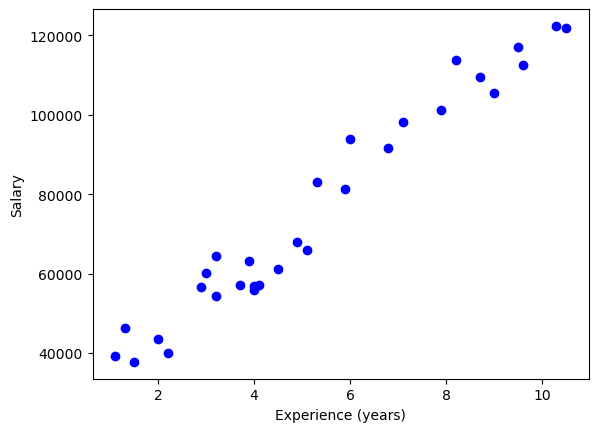

In [60]:
# Visualization

plt.scatter(X, y, c='blue')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()

In [37]:
X = salary_data.iloc[:, 0].values
X.shape
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [39]:
X = X.reshape(30,1)
X.shape
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

In [41]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (27, 1)
y_train:  (27,)
X_test:  (3, 1)
y_test:  (3,)


In [61]:
#Fitting Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [62]:
print(X_test)
y_test

[[1.5]
 [5.3]
 [1.3]]


array([37731., 83088., 46205.])

In [71]:
import numpy as np
experiences = np.array([10.5, 7.4, 1.8, 6])
experiences = experiences.reshape(4,1)

y_pred = regressor.predict(experiences)

for idx in range(len(y_pred)):
    print(f"predicted salary is ${round(y_pred[idx], 2)} for {experiences[idx]} years")

predicted salary is $125214.69 for [10.5] years
predicted salary is $95487.27 for [7.4] years
predicted salary is $41786.13 for [1.8] years
predicted salary is $82061.98 for [6.] years


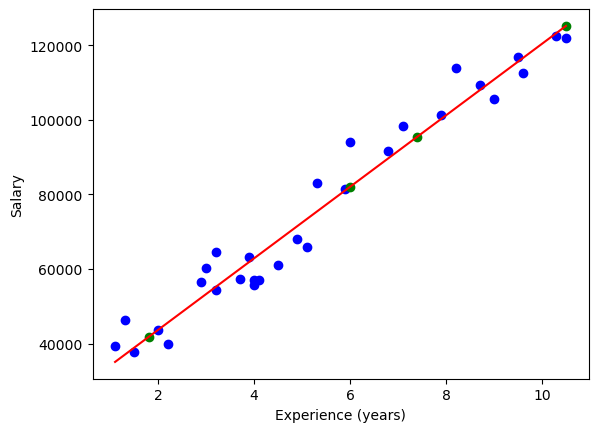

In [73]:
# Visualization
y_pred_all = regressor.predict(X)

plt.scatter(X, y, c='blue')
plt.scatter(experiences, y_pred, c='green')
plt.plot(X, y_pred_all, c='r')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()

In [21]:
prediksi = regressor.predict([[1],[2]])
for item in prediksi:
    print(f"salary ${round(item, 2)}")

salary $34563.45
salary $44095.16


### Animate Tranining process

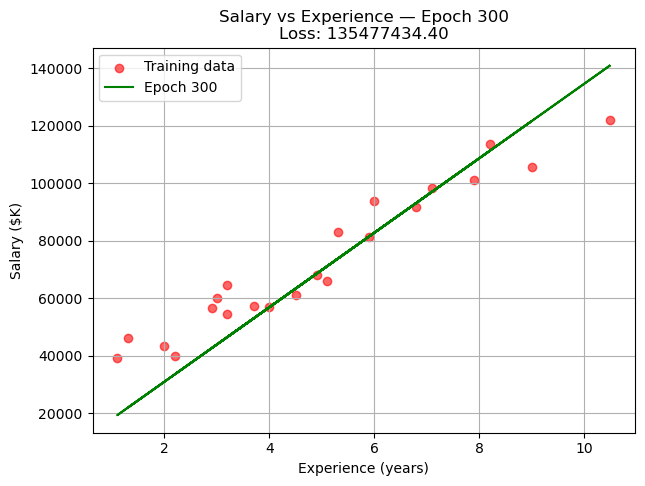

Training complete! Final parameters: w = 12960.0709, b = 5012.8222


In [79]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Import data
salary_data = pd.read_csv('Salary_Data.csv')

# Separate independent and dependent variables
X = salary_data.iloc[:, :-1].values.flatten()
y = salary_data.iloc[:, -1].values.flatten()

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# Initialize parameters for manual gradient descent
w = 0.0   # weight
b = 0.0   # bias
lr = 0.001  # learning rate
epochs = 300  # number of iterations

delay = 0.1  # delay for animation

# Gradient descent animation
for epoch in range(epochs):
    # Predicted values
    y_pred = w * X_train + b
    
    # Compute gradients
    dw = (-2 / len(X_train)) * np.sum(X_train * (y_train - y_pred))
    db = (-2 / len(X_train)) * np.sum(y_train - y_pred)
    
    # Update parameters
    w -= lr * dw
    b -= lr * db
    
    # Compute loss (MSE)
    loss = np.mean((y_train - y_pred)**2)
    
    # Clear previous output (so it animates in Jupyter)
    clear_output(wait=True)
    
    # Plot training progress
    plt.figure(figsize=(7,5))
    plt.scatter(X_train, y_train, color='red', label="Training data", alpha=0.6)
    plt.plot(X_train, w * X_train + b, color='green', label=f"Epoch {epoch+1}")
    plt.title(f"Salary vs Experience — Epoch {epoch+1}\nLoss: {loss:.2f}")
    plt.xlabel('Experience (years)')
    plt.ylabel('Salary ($K)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    time.sleep(delay)  # short pause to see the animation

print(f"Training complete! Final parameters: w = {w:.4f}, b = {b:.4f}")

In [85]:
!pip --version


pip 23.3.1 from /opt/anaconda3/lib/python3.11/site-packages/pip (python 3.11)
